In [ ]:
## Library imports

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import folium
from folium.plugins import HeatMap
from datetime import datetime

In [7]:
# Load CSV
df = pd.read_csv('temperature_readings.csv', parse_dates=['date'])

In [12]:
df

,date,temperature,latitude,longitude
0,2025-04-01,15.2,48.8566,2.3522
1,2025-04-02,16.0,48.8571,2.3499
2,2025-04-03,14.8,48.8590,2.3511
3,2025-04-04,17.1,48.8544,2.3538
4,2025-04-05,18.3,48.8584,2.3545
5,2025-04-06,16.7,48.8552,2.3559
6,2025-04-07,19.0,48.8600,2.3490
7,2025-04-08,20.1,48.8612,2.3475
8,2025-04-09,21.4,48.8577,2.3488
9,2025-04-10,19.9,48.8562,2.3525


In [13]:
# Custom function to map temperature to color
def temperature_to_color(temp):
    if temp < 0:
        return 'darkblue'
    elif temp < 10:
        return 'blue'
    elif temp < 15:
        return 'lightblue'
    elif temp < 20:
        return 'orange'
    else:
        return 'red'

In [20]:
# Normalize temperature for colormap
norm = mcolors.Normalize(vmin=df['temperature'].min(), vmax=df['temperature'].max())
cmap = plt.get_cmap('coolwarm')

# Function to convert normalized color to hex
def temperature_to_hex(temp):
    rgba = cmap(norm(temp))
    return mcolors.to_hex(rgba)

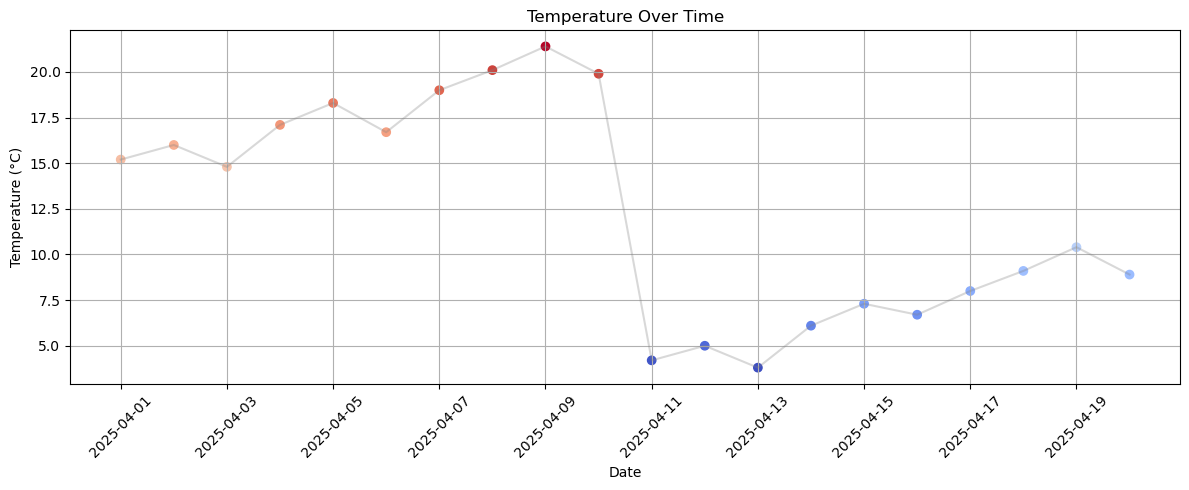

In [21]:
# Plot 1: Temperature over time
plt.figure(figsize=(12, 5))
colors = [temperature_to_hex(t) for t in df['temperature']]
plt.scatter(df['date'], df['temperature'], color=colors)
plt.plot(df['date'], df['temperature'], color='gray', alpha=0.3)
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Plot 2: Map with temperature-colored points
m = folium.Map(location=[50, 10], zoom_start=4)

# Add points
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=7,
        color=None,
        fill=True,
        fill_opacity=0.7,
        fill_color=temperature_to_hex(row['temperature']),
        tooltip=f"{row['date'].date()} - {row['temperature']}°C"
    ).add_to(m)

# Display map
m